# How did COVID in India impact stock market
Let us analyse the impact of covid cases and vaccination, either increase or decrease, on stock market. Although it is common sense to conclude that increase in covid cases results in lockdowns and the economy is stopped, the production output decreases and as a result, profitability of companies decrease, and hence the stock prices go down. But majorly the stock market goes down because the market reacts to positive and negative news(for our case, covid news) and this impacts the stock market's index.

But given the increase in levels of stock market indexes even when cases were not declining, is covid really impacting the stock market? What role does vaccination play into the positive mood of the market?

I am using the Covid data from kaggle - https://www.kaggle.com/sudalairajkumar/covid19-in-india which has details of all the positive cases from 30th january 2020, to 7th July 2021. 
I have downloaded the stock market data from https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm for the same time period.

# INITIAL TASKS :-

####  1. IMPORTING REQUIRED LIBRARIES
####  2.Data Preparation and Cleaning
We need to format dates as we will be using more than one data sets so that it becomes easier to plot them on the same chart. We will also use MinMaxScaler to bring the range of value between 0-1 so that we can plot values on the same chart   

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
import matplotlib.dates as mdates
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Analysis of Covid Data India


In [2]:
covid_india_df = pd.read_csv('/Users/parveenkumar/Desktop/stock market vs covid 19/covid_19_india.csv')
covid_india_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
covid_india_df['Date'].dtype


dtype('O')

In [4]:
#It is better to parse string dates to datetime format. It is useful when we have more than one data sources.
covid_india_df['Date'] = pd.to_datetime(covid_india_df['Date'], format='%Y-%m-%d')
covid_india_df['Date'].dtype

dtype('<M8[ns]')

In [5]:
#Since we have data for indiviudal states, let's combine them on a day basis
confirmed_cases_cumulative = covid_india_df.groupby('Date').sum()

#Set dates as index as that will be our x-axis always
covid_india_df = covid_india_df.set_index('Date')

In [6]:
covid_india_df.head()


,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3


In [7]:
#Also, our data has cases on a cumulative basis i.e new cases + existing active cases, but we need the new cases daily for our analysis. So let us modify that.
#  df['salary'] = df['salary'].diff().fillna(df['salary'].iloc[0])
#confirmed_cases_cumulative['Confirmed'] = confirmed_cases_cumulative['Confirmed'].diff().fillna(confirmed_cases_cumulative['Confirmed'].iloc[0])
confirmed_cases_cumulative['Confirmed'] = confirmed_cases_cumulative['Confirmed'].diff().fillna(0)


In [8]:
confirmed_cases_cumulative['Confirmed'].describe()

count       560.000000
mean      57208.053571
std       83169.399503
min           0.000000
25%        9980.000000
50%       35149.000000
75%       62313.500000
max      414188.000000
Name: Confirmed, dtype: float64

Text(0.5, 1.0, 'New Covid Cases on a daily basis')

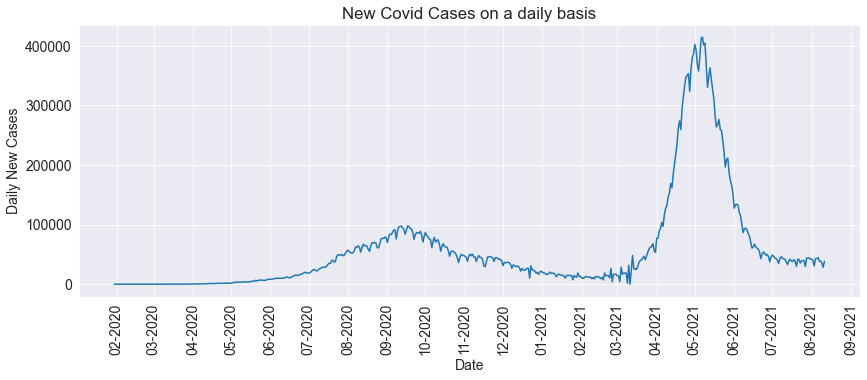

In [9]:
ax = plt.gca() #Fetching axis details
formatter = mdates.DateFormatter("%m-%Y") 
ax.xaxis.set_major_formatter(formatter) #Setting formatter for x-axis, so that the plot looks clean

locator = mdates.MonthLocator() #Setting locator to a month, so that we get a good plot 
ax.xaxis.set_major_locator(locator)

plt.plot(confirmed_cases_cumulative['Confirmed'])
plt.xticks(rotation=90) #rotating the x-axis tick values by 90 to make it vertical

plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('New Covid Cases on a daily basis')

#As per the above chart, we can conclude that the Covid Case first peaked around mid September, and then in mid June

 

# Analysis of NSE Index Data


In [10]:
nse_df1 = pd.read_csv('/Users/parveenkumar/Desktop/stock market vs covid 19/data.csv')
nse_df2 = pd.read_csv('/Users/parveenkumar/Desktop/stock market vs covid 19/data2.csv')


In [11]:
nse_df=pd.concat([nse_df1,nse_df2])


In [12]:
nse_df.describe()
nse_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,01-Feb-2020,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
3,03-Feb-2020,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
4,04-Feb-2020,11786.25,11986.15,11783.40,11979.65,560430291,22338.50


In [13]:
nse_df['Date'] = pd.to_datetime(nse_df['Date'])

In [14]:
nse_df = nse_df.set_index('Date') 
#It is important to assign the output to a dataframe, as it always returns a new dataframe, or use inPlace=True

In [15]:
nse_df

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2020-01-30,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
2020-01-31,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2020-02-01,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
2020-02-03,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
2020-02-04,11786.25,11986.15,11783.40,11979.65,560430291,22338.50
...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,17359.97
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,18015.42
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,14976.54


Text(0.5, 1.0, 'NSE Index Price')

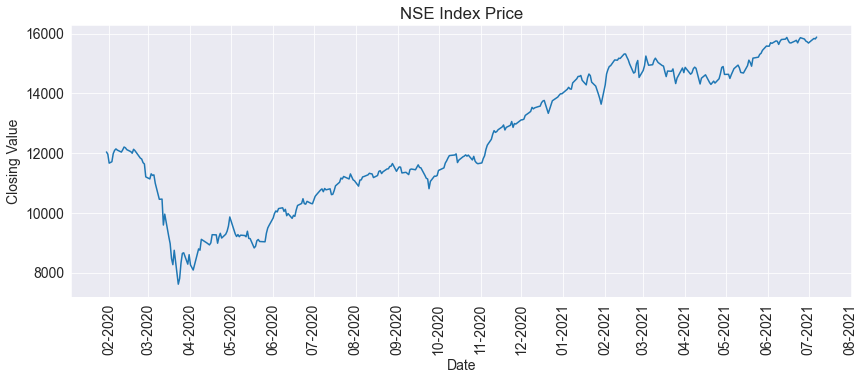

In [16]:
ax = plt.gca() #Fetching axis details
formatter = mdates.DateFormatter("%m-%Y") 
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator() #Setting locator to a month, so that we get a good plot 
ax.xaxis.set_major_locator(locator)


plt.plot(nse_df['Close'])
plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('NSE Index Price')

#### It seems that the index falled from 12000 to below 8000 from February to mid March, and then bounced back to around 16000 in July 2020




### Q1: What is the effect of covid cases on stock market?

Let us now merge the two dataframe based on indexes. By default, it'll try to merge using index if the index name is same, and since we have same date index in both our dataframes, it will merge without any issue. Or else, we can also set left_index and right_index values to True to merge on indexes


 

In [17]:
merged_df = confirmed_cases_cumulative.merge(nse_df, left_index=True, right_index=True)


In [18]:
merged_df.head()


,Sno,Cured,Deaths,Confirmed,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,,,,,
2020-01-30,1,0,0,0.0,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
2020-01-31,2,0,0,0.0,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2020-02-01,3,0,0,1.0,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
2020-02-03,5,0,0,0.0,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
2020-02-04,6,0,0,0.0,11786.25,11986.15,11783.40,11979.65,560430291,22338.50


Text(0.5, 0, 'Date')

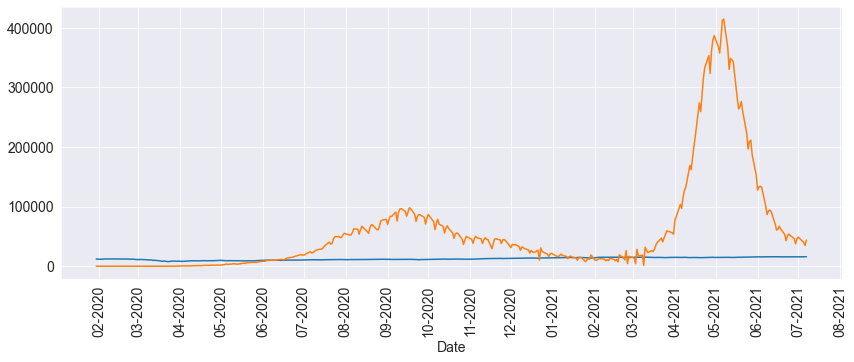

In [19]:
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(merged_df['Close'])

plt.xticks(rotation=90)

plt.plot(merged_df['Confirmed'])
plt.xlabel('Date')

This looks a bit strange, isn't it? That is because, our values of the two dataframes are very different in nature. For covid data, our value ranges from 0 to 414188, where as our nse data ranges from 7600 to 15890. Hence we need to bring both the data to the same scale in order to see the impact of covid on the index value. For that, let us use MinMaxScaler, a library from scikit-learn.

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()


In [21]:
merged_df[["Confirmed", "Close"]] = min_max_scaler.fit_transform(merged_df[["Confirmed", "Close"]])


Text(0.5, 0, 'Date')

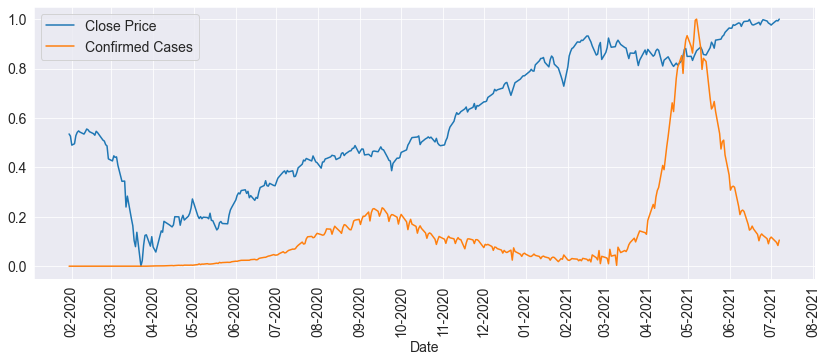

In [22]:
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(merged_df['Close'])
plt.xticks(rotation=90)

plt.plot(merged_df['Confirmed'])
plt.legend(['Close Price','Confirmed Cases'])
plt.xlabel('Date')

  Inference 1 - The stock market dipped when Covid-19 began in India. There are other various dips during the month on May and June. The market went down again after recovering after mid-september when the covid cases peaked. After that, overall market has been growing to higher levels excluding one fall in february 2021 and then a sluggish period from there till June as covid cases kept increasing. Overall, we can see that there is a relation between covid cases and stock market. During both the covid peaks, the market falled. We cannot conclude the reason as covid for other dips mainly in February 2021 and May 2020.

### Q2: What is the effect of lockdowns on stock market?


In [23]:
lockdown_dates = pd.to_datetime(['2020-01-30','2020-02-04','2020-03-03','2020-03-10','2020-03-22','2020-03-25','2020-04-14','2020-05-01','2020-05-18'], format='%Y-%m-%d')
lockdown_events = ['First Covid Case', 'Foreign Visa Cancelled', 'Narendra Modi tweeted','First 50 cases', 'Janta Curfew','Lockdown 1','Lockdown 2','Lockdown 3','Lockdown 4']

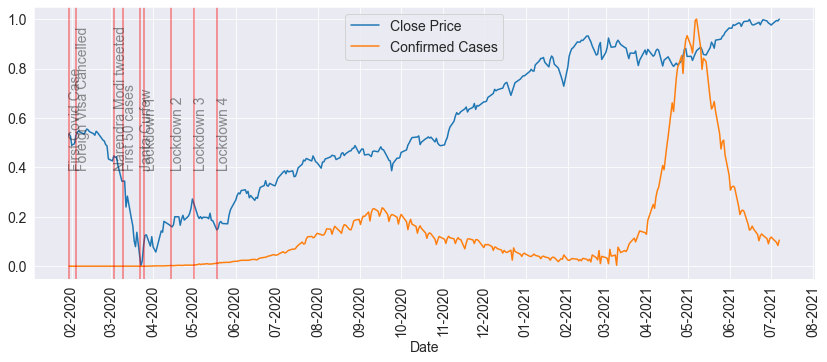

In [25]:
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

plt.xlabel('Date')
# plt.plot(merged_df['Close'][:'2020-12-31'])
# plt.plot(merged_df['Confirmed'][:'2020-12-31'])
plt.plot(merged_df['Close'])
plt.xticks(rotation=90)
plt.plot(merged_df['Confirmed'])
plt.legend(['Close Price','Confirmed Cases'])

for date, event in zip(lockdown_dates, lockdown_events):
    plt.axvline(date ,color = 'r', alpha = 0.5)
    plt.text(date, 0.4, event, rotation = 90, alpha =0.5)

Inference 2 - We can see that after each lockdown announcement, there is a small dip in the market, but soon the market recovered from that point. We can also observe, that the major fall was after the tweet and first 50 cases were detected in India. Although, a tweet and first 50 cases does not seem to be that of a negative news, which can bring a fall of almost 40%. Two factors which i can think of is, global activity stopped during that time as other countries were in lockdown and future lockdown expectations

### Q3: What is the effect of removing lockdown restrictions on stock market?


In [26]:
reopening_dates = pd.to_datetime(['2020-06-08','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01'], format='%Y-%m-%d')
reopening_events = ['Unlock 1', 'Unlock 2', 'Unlock 3', 'Unlock 4', 'Unlock 5', 'Unlock 6']

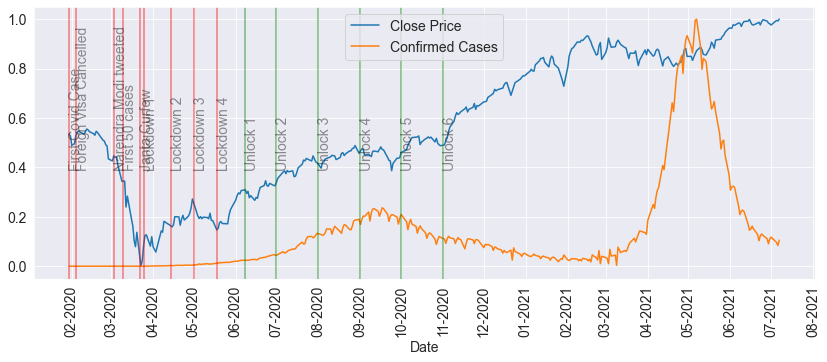

In [27]:
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

plt.xlabel('Date')
# plt.plot(merged_df['Close'][:'2020-12-31'])
# plt.plot(merged_df['Confirmed'][:'2020-12-31'])
plt.plot(merged_df['Close'])
plt.xticks(rotation=90)

plt.plot(merged_df['Confirmed'])
plt.legend(['Close Price','Confirmed Cases'])

for date, event in zip(lockdown_dates, lockdown_events):
    plt.axvline(date ,color = 'r', alpha = 0.5)
    plt.text(date, 0.4, event, rotation = 90, alpha =0.5)
    
for date, event in zip(reopening_dates, reopening_events):
    plt.axvline(date ,color = 'g', alpha = 0.5)
    plt.text(date, 0.4, event, rotation = 90, alpha = 0.5)

Inference 3 - After every unlock, there is a rise seen in the index value, except unlock 1 and unlock 4. In unlock 1, the market recovered soon after a dip and rose to better levels overall. After unlock 4, the market went up, but it fell down soon. The reason for this could be the first covid peak level that was reached during the same period.

### Q4: What is the effect of vaccination on stock market?


In [37]:
vaccination_df = pd.read_csv('/Users/parveenkumar/Desktop/stock market vs covid 19/covid_vaccine_statewise.csv')
vaccination_df.State.unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

#### This data has India + other states data, let us check if the values match or not
Let us first format the date to a common format using pd.to_datetime()

In [38]:
vaccination_df['Updated On'] = pd.to_datetime(vaccination_df['Updated On'], format='%d/%m/%Y')
vaccination_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [39]:
#Also, our data has cases on a cumulative basis i.e new cases + existing active cases, but we need the new cases daily for our analysis. So let us modify that.
vaccination_df['Total Individuals Vaccinated'] = vaccination_df['Total Individuals Vaccinated'].diff().fillna(0)

In [40]:
#This stores data where state=India
country_vaccination_df = vaccination_df[vaccination_df['State']=='India'][['State','Total Individuals Vaccinated']]
country_vaccination_df.describe()

,Total Individuals Vaccinated
count,2.120000e+02
mean,1.182116e+06
std,1.368871e+06
min,0.000000e+00
25%,0.000000e+00
50%,6.640410e+05
75%,2.093762e+06
max,8.077099e+06


In [41]:
#Updating the main df to exclude fields that has state = India
vaccination_df = vaccination_df[vaccination_df['State']!='India']
vaccination_df.State.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [42]:
#Let us add all the doses administered in various states to calculate the total doses administered on a single day.
vaccination_df = vaccination_df.groupby('Updated On').sum()
vaccination_df['Total Individuals Vaccinated'].describe()

count    2.130000e+02
mean     1.176525e+06
std      1.367982e+06
min     -2.630000e+03
25%      0.000000e+00
50%      6.610610e+05
75%      2.082439e+06
max      8.068636e+06
Name: Total Individuals Vaccinated, dtype: float64

Text(0.5, 0, 'Total Individuals Vaccinated')

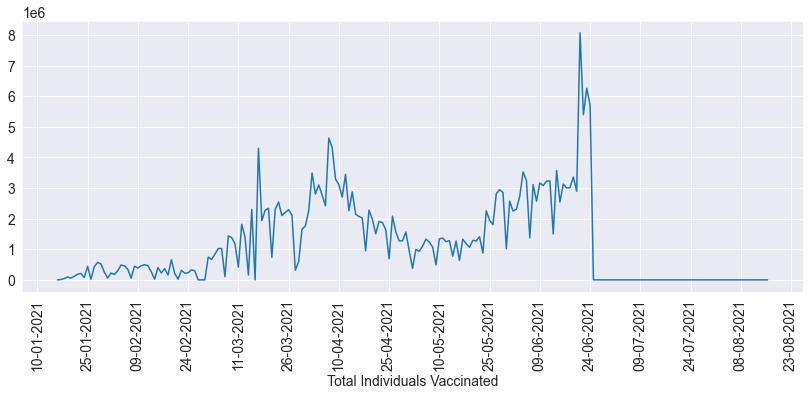

In [43]:
ax = plt.gca()
formatter = mdates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator(interval = 15)
ax.xaxis.set_major_locator(locator)
plt.xticks(rotation=90)

plt.plot(vaccination_df['Total Individuals Vaccinated'])
plt.xlabel('Date')
plt.xlabel('Total Individuals Vaccinated')

In [51]:
#Now to plot it against the previous charts that had NSE index and Covid Cases data, we need to scale the values of Total Doses Adminstered to 0-1

vaccination_df[['Total Individuals Vaccinated']] = min_max_scaler.fit_transform(vaccination_df[['Total Individuals Vaccinated']])


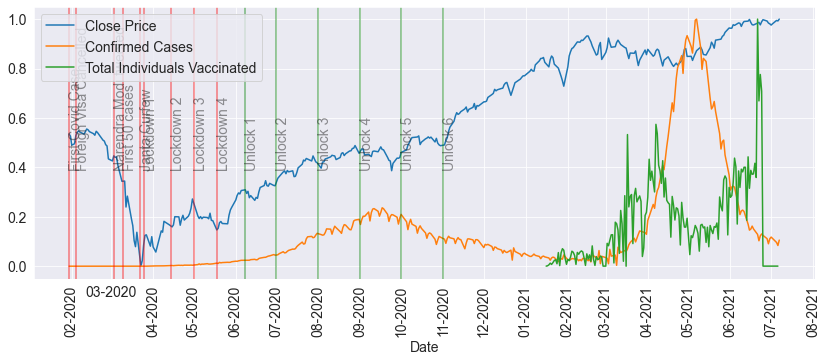

In [57]:
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

plt.xlabel('Date')
plt.xticks(rotation=90)
# plt.plot(merged_df['Close'][:'2020-12-31'])
# plt.plot(merged_df['Confirmed'][:'2020-12-31'])
plt.plot(merged_df['Close'])
plt.plot(merged_df['Confirmed'])
plt.plot(vaccination_df['Total Individuals Vaccinated'][:172])
plt.legend(['Close Price','Confirmed Cases','Total Individuals Vaccinated'])

for date, event in zip(lockdown_dates, lockdown_events):
    plt.axvline(date ,color = 'r', alpha = 0.5)
    plt.text(date, 0.4, event, rotation = 90, alpha =0.5)
    
for date, event in zip(reopening_dates, reopening_events):
    plt.axvline(date ,color = 'g', alpha = 0.5)
    plt.text(date, 0.4, event, rotation = 90, alpha = 0.5)
    
    
    
    

Inference 4 - In the initial stages of vaccination, the market rose to higher levels. But after that, even though the vaccinations were increasing on a daily basis, the market kept going down, probably because of the rise in covid cases. After the second covid peak, the vaccination count kept increasing and market also recovered with 2 positive news, i.e decreasing covid cases and increasing vaccination. Overall, vaccination number does not seem to be affecting the market much when compared to covid cases.

# References and Future Work
We can use other information like GDP growth, repo rates and information around curfews that were in place during second peak which again slowed down the economy.